In [1]:
# Import pandas packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Upload Analyst_Test_Tasks.csv
tasks = pd.read_csv('Analyst_Test_Tasks.csv')
tasks.head()

,Patient drchrono ID,Category,Status,Priority,Assigned To,Created on,Create by,Updated on,Next Appt Date,HC20 Status,HC20 Substatus,Stratification level,Last Appointment Date
0,60094576,Specimen Collection,Complete,20,MOXXIadmin,2016-07-22T14:14:20,Neilsolomon,2018-03-28T21:14:32,NaN,NaN,NaN,NaN,2016-08-05 21:30:00
1,59946176,Phone Call,Complete,20,MOXXIadmin,2016-08-25T20:07:00,nsome,2018-03-28T21:14:32,2018-07-26T17:00:00.000Z,Enrolled,Scheduled,High,2018-06-20 21:30:00
2,59740292,Phone Call,Complete,20,MOXXIadmin,2016-08-29T18:23:10,nsome,2018-03-28T21:14:32,2018-03-30T15:30:00.000Z,Disenrolled,Ineligible - insurance,NaN,2018-02-21 19:15:00
3,60121538,Phone Call,Complete,20,MOXXIadmin,2016-09-02T15:08:08,nsome,2018-03-28T21:14:32,NaN,Disenrolled,Ineligible - insurance,NaN,2018-03-13 16:55:00
4,60121538,NaN,Complete,20,MOXXIadmin,2016-09-06T08:54:44,nsome,2018-03-28T21:14:32,NaN,Disenrolled,Ineligible - insurance,NaN,2018-03-13 16:55:00


In [3]:
# Overview the info on tasks set
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 0 to 3658
Data columns (total 13 columns):
Patient drchrono ID      3659 non-null int64
Category                 3445 non-null object
Status                   3659 non-null object
Priority                 3659 non-null int64
Assigned To              3598 non-null object
Created on               3659 non-null object
Create by                2961 non-null object
Updated on               3659 non-null object
Next Appt Date           2411 non-null object
HC20 Status              3646 non-null object
HC20 Substatus           3646 non-null object
Stratification level     621 non-null object
Last Appointment Date    3659 non-null object
dtypes: int64(2), object(11)
memory usage: 371.7+ KB


In [4]:
# Check for null value (NAN)
tasks.isnull().sum()

Patient drchrono ID         0
Category                  214
Status                      0
Priority                    0
Assigned To                61
Created on                  0
Create by                 698
Updated on                  0
Next Appt Date           1248
HC20 Status                13
HC20 Substatus             13
Stratification level     3038
Last Appointment Date       0
dtype: int64

In [5]:
tasks.drop(['Stratification level', 'Next Appt Date','Create by'],axis =1, inplace=True)

In [6]:
tasks.dropna(inplace=True)

In [7]:
tasks.isnull().sum()

Patient drchrono ID      0
Category                 0
Status                   0
Priority                 0
Assigned To              0
Created on               0
Updated on               0
HC20 Status              0
HC20 Substatus           0
Last Appointment Date    0
dtype: int64

In [8]:
# Check how many categories in Status and the number of each category
tasks['Status'].value_counts()

Complete       2494
In Progress     633
Open            149
On Hold          58
Authorized       39
Back to PCP       3
Name: Status, dtype: int64

In [9]:
# Check how many people are assigned to modify the dataset
tasks['Assigned To'].value_counts()

MOXXIadmin          2317
suzztasharma         203
gblandon             189
marlenegarcia        163
CareCoordinators     110
pvallejo             108
aarreola              92
darzate               68
kelder                15
aalmanza              15
mdavis07              12
cmathews              11
kapostol               9
ebenons                7
HRubin                 7
epopoca                6
Neilsolomon            5
hanzaldua              4
stinajero              4
ggardner               4
nsome                  4
mduarte                4
hcolomer               3
AmandaMay              3
mariadperez            2
egragnani              2
GFedalizo              1
MyrnaGonzalez          1
mikejimenez            1
alexgerson             1
DanaLewis              1
CMiranda               1
CSobrian               1
cristianpacheco        1
aglaros                1
Name: Assigned To, dtype: int64

In [10]:
# Check for uncomplete task
tasks_unfinished = tasks.loc[tasks['Status'] !='Complete']
tasks_unfinished

,Patient drchrono ID,Category,Status,Priority,Assigned To,Created on,Updated on,HC20 Status,HC20 Substatus,Last Appointment Date
262,69026616,Referral,In Progress,20,aarreola,2017-10-13T13:49:15,2018-06-28T19:27:28,Enrolled,Scheduled,2018-05-17 16:00:00
368,69321260,Medical Records Request,On Hold,20,CareCoordinators,2017-11-30T16:25:15,2018-07-09T11:44:21,Enrolled,Appt completed,2018-06-01 18:00:00
377,68793552,Medical Records Request,On Hold,20,cmathews,2017-12-04T13:10:20,2018-06-25T16:08:44,Enrolled,Scheduled,2018-07-06 20:15:00
391,67917278,Medical Records Request,In Progress,20,suzztasharma,2017-12-06T14:17:21,2018-06-19T17:21:40,Enrolled,Scheduled,2018-06-08 19:15:00
427,70296028,Medical Records Request,In Progress,40,suzztasharma,2017-12-11T20:02:23,2018-06-08T17:41:18,Enrolled,Scheduled,2018-07-09 20:30:00
...,...,...,...,...,...,...,...,...,...,...
3653,72627908,Medical Records Request,In Progress,30,gblandon,2018-07-13T17:13:31,2018-07-13T19:36:31,Enrolled,Scheduled,2018-07-13 19:40:00
3655,59660512,Pharmacy Request,Open,20,nsome,2018-07-13T19:21:48,2018-07-13T19:21:48,Enrolled,Scheduled,2018-07-12 20:55:00
3656,75868580,Phone Call,Open,20,Neilsolomon,2018-07-13T21:18:31,2018-07-13T21:18:31,Enrolled,Scheduled,2018-07-12 21:45:00
3657,75752396,DME,Open,20,CareCoordinators,2018-07-14T02:01:09,2018-07-14T02:01:09,Enrolled,Scheduled,2018-07-13 21:50:00


In [11]:
# Check who weren't complete the status they were assigned to
tasks_unfinished['Assigned To'].value_counts()

suzztasharma        198
marlenegarcia       152
gblandon            132
CareCoordinators     95
aarreola             83
pvallejo             80
darzate              68
cmathews             10
aalmanza              7
kapostol              7
HRubin                6
ebenons               6
Neilsolomon           5
mduarte               4
hanzaldua             4
stinajero             4
ggardner              4
nsome                 3
epopoca               3
MOXXIadmin            3
mariadperez           2
kelder                1
MyrnaGonzalez         1
egragnani             1
DanaLewis             1
mdavis07              1
hcolomer              1
Name: Assigned To, dtype: int64

In [12]:
# Name of Care Coordinators from the Care Coordinator Names data set
CareCoordiantor_Names = pd.read_csv('Care Coordinator Names.csv')
CareCoordiantor_Names

,There are 7 care coordinators:
0,Aarreola
1,Pvallego
2,marlenegarcia
3,suzztasharma
4,CareCoordinators
5,darzate
6,gblandon


In [13]:
# Check for the Completed tasked
tasks_completed = tasks.loc[tasks['Status'] =='Complete']
#tasks_completed =tasks_completed.set_index('Status')
tasks_completed.head()

,Patient drchrono ID,Category,Status,Priority,Assigned To,Created on,Updated on,HC20 Status,HC20 Substatus,Last Appointment Date
1,59946176,Phone Call,Complete,20,MOXXIadmin,2016-08-25T20:07:00,2018-03-28T21:14:32,Enrolled,Scheduled,2018-06-20 21:30:00
2,59740292,Phone Call,Complete,20,MOXXIadmin,2016-08-29T18:23:10,2018-03-28T21:14:32,Disenrolled,Ineligible - insurance,2018-02-21 19:15:00
3,60121538,Phone Call,Complete,20,MOXXIadmin,2016-09-02T15:08:08,2018-03-28T21:14:32,Disenrolled,Ineligible - insurance,2018-03-13 16:55:00
5,60794436,Phone Call,Complete,20,MOXXIadmin,2016-09-14T18:30:16,2018-03-28T21:14:32,Closed lead,Ineligible - medical,1970-01-01 00:00:00
6,60121538,Specimen Collection,Complete,20,MOXXIadmin,2016-10-05T18:44:30,2018-03-28T21:14:32,Disenrolled,Ineligible - insurance,2018-03-13 16:55:00


In [14]:
# check for the last 5 completed tasks on the file - Having a comprehension of the entire completed tasks file
tasks_completed.tail()

,Patient drchrono ID,Category,Status,Priority,Assigned To,Created on,Updated on,HC20 Status,HC20 Substatus,Last Appointment Date
3618,63200518,Phone Call,Complete,20,MOXXIadmin,2018-07-12T17:49:36,2018-07-12T18:45:15,Enrolled,Scheduled,2018-06-20 18:45:00
3622,74281416,Lab Results,Complete,20,MOXXIadmin,2018-07-12T20:09:40,2018-07-13T20:07:46,Enrolled,Scheduled,2018-07-11 18:05:00
3624,74281416,Lab Results,Complete,20,MOXXIadmin,2018-07-12T21:15:54,2018-07-13T18:37:16,Enrolled,Scheduled,2018-07-11 18:05:00
3629,64972484,Lab Results,Complete,20,gblandon,2018-07-13T11:16:10,2018-07-13T15:20:30,Enrolled,Scheduled,2018-07-12 19:35:00
3654,74177154,Pharmacy Request,Complete,20,MOXXIadmin,2018-07-13T18:35:35,2018-07-13T19:34:59,Enrolled,Scheduled,2018-06-28 22:50:00


In [15]:
# check to see how many categorical tasks in the data set (11 categories of tasks)
tasks['Category'].value_counts()

Referral                   1193
Phone Call                  613
Medical Records Request     437
DME                         280
Pharmacy Request            262
Lab Results                 217
Social Services             151
Supplies                     83
Specimen Collection          57
Behavioral Health            48
Transportation               35
Name: Category, dtype: int64

In [16]:
tasks_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2494 entries, 1 to 3654
Data columns (total 10 columns):
Patient drchrono ID      2494 non-null int64
Category                 2494 non-null object
Status                   2494 non-null object
Priority                 2494 non-null int64
Assigned To              2494 non-null object
Created on               2494 non-null object
Updated on               2494 non-null object
HC20 Status              2494 non-null object
HC20 Substatus           2494 non-null object
Last Appointment Date    2494 non-null object
dtypes: int64(2), object(8)
memory usage: 214.3+ KB


In [17]:
#import datetime
#tasks_completed['Created on'] = tasks_completed['Created on'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
#print (type(tasks_completed['Created on'][0]))

In [18]:
#Convert UTC datetime format to US/Pacific datetime format
#from datetime import datetime
#for x in ['Created on', 'Updated on','Last Appointment Date']:
   # if x in tasks.columns:
        #tasks[x] = pd.to_datetime(tasks[x], format="%Y-%m-%d").dt.floor("d")

In [19]:
# convert to datetime column
tasks_completed['Created on']=pd.to_datetime(tasks_completed['Created on'],format='%Y-%m-%d')
tasks_completed['Updated on']=pd.to_datetime(tasks_completed['Updated on'],format='%Y-%m-%d')



/Users/thoashook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/thoashook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
tasks_completed.head()

,Patient drchrono ID,Category,Status,Priority,Assigned To,Created on,Updated on,HC20 Status,HC20 Substatus,Last Appointment Date
1,59946176,Phone Call,Complete,20,MOXXIadmin,2016-08-25 20:07:00,2018-03-28 21:14:32,Enrolled,Scheduled,2018-06-20 21:30:00
2,59740292,Phone Call,Complete,20,MOXXIadmin,2016-08-29 18:23:10,2018-03-28 21:14:32,Disenrolled,Ineligible - insurance,2018-02-21 19:15:00
3,60121538,Phone Call,Complete,20,MOXXIadmin,2016-09-02 15:08:08,2018-03-28 21:14:32,Disenrolled,Ineligible - insurance,2018-03-13 16:55:00
5,60794436,Phone Call,Complete,20,MOXXIadmin,2016-09-14 18:30:16,2018-03-28 21:14:32,Closed lead,Ineligible - medical,1970-01-01 00:00:00
6,60121538,Specimen Collection,Complete,20,MOXXIadmin,2016-10-05 18:44:30,2018-03-28 21:14:32,Disenrolled,Ineligible - insurance,2018-03-13 16:55:00


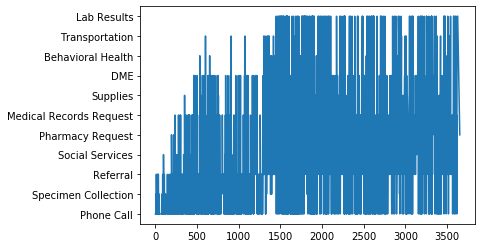

In [21]:
plt.plot(tasks_completed['Category'])